# mdanalysis

## 10/7/2021

<a href="?print-pdf">print view</a>

In [2]:
%%html
<script src="http://bits.csb.pitt.edu/asker.js/lib/asker.js"></script>
<script>

$3Dmolpromise = new Promise((resolve, reject) => { 
    require(['https://3dmol.org/build/3Dmol-nojquery.js'], function(){       
            resolve();});
});

require(['https://cdnjs.cloudflare.com/ajax/libs/Chart.js/2.2.2/Chart.js'], function(Ch){
 Chart = Ch;
});

$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');


//the callback is provided a canvas object and data 
var chartmaker = function(canvas, labels, data) {
  var ctx = $(canvas).get(0).getContext("2d");
     var dataset = {labels: labels,                     
    datasets:[{
     data: data,
     backgroundColor: "rgba(150,64,150,0.5)",
         fillColor: "rgba(150,64,150,0.8)",    
  }]};
  var myBarChart = new Chart(ctx,{type:'bar',data:dataset,options:{legend: {display:false},
        scales: {
            yAxes: [{
                ticks: {
                    min: 0,
                }
            }]}}});
};

$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();



</script>



# Molecular Dynamics

The simulation of the physical motions of atoms using classical physics (Newton's equations of motion).

* Forces determined by a *force field*
* Biological force fields are primarily calibrated for proteins
* Simulation done in a small box (usually only a few proteins)
* Result is an approximation 


<video width="784" height="656" controls>
  <source src="https://asinansaglam.github.io/python_bio_2022/files/eye6.mp4" type="video/mp4">
  <source src="https://asinansaglam.github.io/python_bio_2022/files/eye6.webm" type="video/webm">
  <object data="https://asinansaglam.github.io/python_bio_2022/files/eye6.mp4" width="784" height="656">
  </object>
</video> 

In [3]:
%%html
<div id="md1" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#md1';
	jQuery(divid).asker({
	    id: divid,
	    question: "Assuming sufficient simulation time, which of the following processes can <b>not</b> be observed in a molecular dynamics simulation?",
		answers: ["The disassociation of two proteins",'The folding of a protein','The construction of RNA by RNA polymerase',
                 'The conformational sampling of residue side chains or short loop regions '],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Why Simulate?

* assess stability of model
* observe dynamics of interactions
* observe effects of mutations
* compute properties of the ensemble
* ...

A typically simulation ranges from 10ns to 100ns, so we are limited in the sorts of processes that can be observed.

# MD Packages

Amber [http://ambermd.org](http://ambermd.org)

* Fastest GPU implementation (in my experience)

Gromacs [http://www.gromacs.org](http://www.gromacs.org)

* Open-source (LGPL)

NAMD [http://www.ks.uiuc.edu/Research/namd/](http://www.ks.uiuc.edu/Research/namd/)

* Highly optimized for cluster computing
* Integrated with VMD

LAMMPS [http://lammps.sandia.gov](http://lammps.sandia.gov)

* Open-source (GPL)


# Forcefields

The forcefield determines what forces are applied to each atom.  For example, electrostatic interactions and torsion angle potentials.  Examples of force field *families*:

* CHARMM
* Gromacs
* OPLS
* Amber

$$V(r^N)=\sum_\text{bonds} k_b (l-l_0)^2 + \sum_\text{angles} k_a (\theta - \theta_0)^2 $$
$$+ \sum_\text{torsions} \frac{1}{2} V_n [1+\cos(n \omega- \gamma)] 
+\sum_{j=1} ^{N-1} \sum_{i=j+1} ^N \biggl\{\epsilon_{i,j}\biggl[\left(\frac{r_{0ij}}{r_{ij}} \right)^{12} - 2\left(\frac{r_{0ij}}{r_{ij}} \right)^{6} \biggr]+ \frac{q_iq_j}{4\pi \epsilon_0 r_{ij}}\biggr\}
$$


# Timestep

Every timestep of the simulation (1 or 2 femtoseconds) all the forces exerted on every atom are calculated and the positions and velocities are updated appropriately according to Newton's laws of motion.

In [4]:
%%html
<div id="md2" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#md2';
	jQuery(divid).asker({
	    id: divid,
	    question: "How many seconds is a femtosecond?",
		answers: ["10^-18","10^-15","10^-12","10^-9","10^-6"],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# File Formats

Different packages use different file formats and have different approaches to setting up and running a simulation.  Typically, to start a simulation you need

* a configuration file that specifies how the simulation should be run
* a topology of your system
* initial coordinates of your system (may include velocities)

The output of the simulation is a *trajectory* file.

In [5]:
!wget https://asinansaglam.github.io/python_bio_2022/files/shmt2.prmtop
!wget https://asinansaglam.github.io/python_bio_2022/files/shmt2.dcd
!wget https://asinansaglam.github.io/python_bio_2022/files/shmt2.inpcrd

--2021-10-06 21:34:07--  https://asinansaglam.github.io/python_bio_2022/files/shmt2.prmtop
Resolving mscbio2025.csb.pitt.edu (mscbio2025.csb.pitt.edu)... 136.142.4.139
Connecting to mscbio2025.csb.pitt.edu (mscbio2025.csb.pitt.edu)|136.142.4.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17559824 (17M)
Saving to: ‘shmt2.prmtop’

shmt2.prmtop        100%[===================>]  16.75M  27.9MB/s    in 0.6s    

2021-10-06 21:34:08 (27.9 MB/s) - ‘shmt2.prmtop’ saved [17559824/17559824]

--2021-10-06 21:34:08--  https://asinansaglam.github.io/python_bio_2022/files/shmt2.dcd
Resolving mscbio2025.csb.pitt.edu (mscbio2025.csb.pitt.edu)... 136.142.4.139
Connecting to mscbio2025.csb.pitt.edu (mscbio2025.csb.pitt.edu)|136.142.4.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102836596 (98M)
Saving to: ‘shmt2.dcd’

shmt2.dcd           100%[===================>]  98.07M  49.0MB/s    in 2.0s    

2021-10-06 21:34:10 (49.0 MB/s) - ‘shmt2.dcd’

# Configuration File

These are usually plain text and extremely obtuse without reading the documentation.

Amber: 
<pre>    md of hsp27 implicit
     &cntrl
      imin = 0, ntb = 0,
      igb = 1, ntpr = 100, ntwx = 5000, ntwr = 5000, ntpr = 5000,
      ntt = 3, gamma_ln = 1.0,
      tempi = 300.0, temp0 = 300.0
      nstlim = 50000000, dt = 0.002,
      ntc = 2, 
      cut = 999
     /
     </pre>
     
   

# Topology

The topology stores connectivity and atom type information about a model, but no coordinates.

* .prmtop - Amber
* .psf - NAMD
* .top - Gromacs

Typically you will create a topology from a PDB using the tools provided with the simulation package.  For example, you might use <tt>tleap</tt> in Amber to solvate the protein and create initial coordinates and a topology that includes information about your chosen forcefield.

In [6]:
!head -15 shmt2.prmtop

%VERSION  VERSION_STAMP = V0001.000  DATE = 09/02/15  08:40:14                  
%FLAG TITLE                                                                     
%FORMAT(20a4)                                                                   
default_name                                                                    
%FLAG POINTERS                                                                  
%FORMAT(10I8)                                                                   
   85695      17   78475    7362   16384    9960   33288   31170       0       0
  174624   24681    7362    9960   31170      67     152     191      36       1
       0       0       0       0       0       0       0       2      26       0
       0
%FLAG ATOM_NAME                                                                 
%FORMAT(20a4)                                                                   
N   H1  H2  H3  CA  HA  CB  HB2 HB3 CG  CD1 HD1 NE1 HE1 CE2 CZ2 HZ2 CH2 HH2 CZ3 
HZ3 CE3 HE3 CD2 C  

# Coordinates

A coordinate file provides the (x,y,z) coordinates of each atom in your system.  

For most coordinate formats, the file is useless without the topology.

Some formats also include velocities and/or energies and can be used to *restart* the simulation.

* .pdb - Gromacs, NAMD
* .inpcrd - Amber
* .rst - Amber Restart

In [7]:
!head shmt2.inpcrd

default_name
 85695
  56.0088807  71.7060934  26.6369124  55.9058245  72.6656576  26.9347665
  55.3430908  71.5216067  25.9001704  56.9898190  71.5152073  26.4905496
  55.5961623  70.8150285  27.7784433  54.7545753  70.2022149  27.4555036
  56.7364989  69.8797176  28.2523746  57.1310507  69.3326367  27.3961441
  57.5399895  70.4472121  28.7218987  56.2765422  68.8069283  29.2961567
  55.8725428  67.5289634  29.0305627  55.8943751  67.2239618  27.9843327
  55.5106592  66.8784844  30.1940309  55.1697749  65.9298887  30.2577772
  55.6890532  67.7312641  31.2490638  55.4724345  67.5312695  32.6151225


# Trajectory

The trajectory is the result of the simulation.  These files store the coordinates of every atom of the simulation for every output timestep of the simulation.

These files can be huge, so the minimum amount of information is usually stored (i.e. just coordinates) and the file is useless without the topology.

* .trj, .trr - Gromacs full trajectory
* .xtc - Gromacs compressed trajectory
* .dcd - NAMD
* .mdcrd, .nc - Amber

In [8]:
!head shmt2.dcd

T   CORDd                                 o�:                                    #   T   T      Cpptraj generated dcd file.                                                     T      �N    �: ��B�\�BԇB�хB���Bhd�B��BT��B��B���B�:�BCS�B
L�B&��B�̈́B�Y�B$2�B�5�BكBn�B��Bw݅B�׆B�̅B�B���B0��B��B[Bʍ�B��zB/�vB|B@yB�9|B��B)�yBCHxB�|B�_{B��|B��~BڅzB��{B��|B�vtBL�rB�QqBp�rB�zkBN�iB(�jBŮlB�ffB=:lB�lB�lpB.�hB
�jBdBX�aB�	cBVhB�OcBW�jB��nBE#hB��dB/�kB�eiB�nB�pB�bnB�7qB7JuB�xB<�uB�eB�BgB
�aB��`B_BF\^B0qYB��WB�VBI�YB�?[BN�bBػfBU�aB-J_B��dBB)iB��bB��cB��^B|�dBf�cBkB�IlB70lB�mB��aBѱ]B lbBpcB�idB�nhB._B��\B[�^Brh`B��XB1�WB+�VBq�UB��VBA
aB[�aB�lbB�zaB�CeB�fdB��bB��bB�!eB$]BƢZB�E[B`kB�#nB�SmB��jB� sB�#uB��tB�GyB�sB[�rB-�nB+uB��xB-�qB9�nBksBI�vBP�tBg�vB�qBƑyB�ozB�s|B��nB��kB�nB5EqB*XuB�pB�oB��qB%�oB��iB�ghB��fBKjBBfB�RkB��gB�pB�xsB��qB�pB�wB0ayB��xBu�yB�oxBc;xB��B�m�Bs$�B�aoBD�mB�zoBŐpBKwmB��nBapB�ltBJ'oBR�nB��pB[�jBY�oBl�vBoxBG�xB�lxB�mgB�dB+eB��gB�O_B`�]

In [9]:
%%html
<div id="mdsz" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#mdsz';
	jQuery(divid).asker({
	    id: divid,
	    question: "If a trajectory file stores nothing but the single precision (4 byte) coordinates of 1000 frames of a simulation of a 500 atom system, how big is the trajectory file?",
		answers: ["0.5 MB", "1.5 MB","5.72 MB","6.0 MB",'16 MB',"48 MB"],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
 $(".input .o:contains(html)").closest('.input').hide();


</script>

# mdanalysis

[https://code.google.com/p/mdanalysis/](https://code.google.com/p/mdanalysis/)

"MDAnalysis is an object-oriented python toolkit to analyze molecular dynamics trajectories generated by CHARMM, Gromacs, NAMD, LAMMPS, or Amber."

In [11]:
import MDAnalysis

universe = MDAnalysis.Universe('shmt2.prmtop', 'shmt2.dcd')


MDAnalysis starts with a topology and a trajectory.  

# Atom Groups

In [12]:
universe.atoms

<AtomGroup with 85695 atoms>

You can select a specific group of atoms (very similar to ProDy) using atom selections.

In [13]:
 universe.select_atoms("protein")

<AtomGroup with 14432 atoms>

Selections can work directly on AtomGroups

In [15]:
 universe.select_atoms("resname PRO")

<AtomGroup with 644 atoms>

In [17]:
 universe.select_atoms("byres around 5 resid 370")

<AtomGroup with 245 atoms>

In [18]:
prot = universe.select_atoms("protein")
prot.select_atoms("byres around 5 resid 370") #select whole residues within 5 of residue 100

<AtomGroup with 209 atoms>

Like ProDy, can iterate over atoms

In [19]:
for a in prot.atoms[:3]:
    print(a)

<Atom 1: N of type N3 of resname TRP, resid 1 and segid SYSTEM>
<Atom 2: H1 of type H of resname TRP, resid 1 and segid SYSTEM>
<Atom 3: H2 of type H of resname TRP, resid 1 and segid SYSTEM>


Note that atoms retain information about residues (but generally not chains)

In [20]:
print(a.resid,a.resname,a.resnum)

1 TRP 1


## Residues

AtomGroups can also be traversed and viewed at a residue level

In [ ]:
prot.residues

In [22]:
%%html
<div id="mdres" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#mdres';
	jQuery(divid).asker({
	    id: divid,
	    question: "How many residues are there in our shmt2 protein?",
		answers: [ "22","924","1024","24681","85695"],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Trajectories

In [23]:
universe.trajectory

<DCDReader shmt2.dcd with 100 frames of 85695 atoms>

The coordinates of atoms are determined by the current position in the trajectory (`trajectory.frame`)

**The coordinates of selections refer to whatever the current trajectory frame is**

The current frame is set by iterating over the trajectory or indexing into it.

In [24]:
for ts in universe.trajectory[:5]:
    print(ts.frame, universe.trajectory.frame, ts.time, prot.center_of_mass())

0 0 4.8888212322065376e-05 [63.06938232 61.67971211 47.8073606 ]
1 1 9.777642464413075e-05 [63.0723881  61.69172611 47.80475064]
2 2 0.00014666463696619611 [63.05890957 61.67358912 47.8136455 ]
3 3 0.0001955528492882615 [63.08430546 61.67402582 47.80758225]
4 4 0.0002444410616103269 [63.07228252 61.68630054 47.7999566 ]


# Analysis

A number of packages have been contributed to MDAnalysis to perform common tasks.

In [25]:
import MDAnalysis.analysis

`PACKAGE CONTENTS
    align - aligning structures
    contacts - native contact analysis
    density - compute water densities
    distances - for computing distances
    gnm 
    hbonds - hydrogen bond analysis
    helanal - analysis of helices
    hole - for analyzing pores
    leaflet
    nuclinfo - analysis of nucleic acids
    psa - path simularity
    rms
    waterdynamics - water analysis
    x3dna - a different nucleic analysis
    `

# Alignment

In [26]:
from MDAnalysis.analysis.align import *

Can align a single structure with `alignto`

Use `AlignTraj` to align and write out a full trajectory (trajectories are not kept in memory)

In [27]:
universe.trajectory[0]
#if we align to ourselves, will fit to current frame
alignment = AlignTraj(universe, universe, select='protein',filename='rmsfit.dcd')
alignment.run()

# MDAnalysis.rms

In [28]:
from MDAnalysis.analysis.rms import *  #this pulls in an rmsd function

Root mean squared deviation (RMSD)
$$\sqrt{\frac{\sum_i^n(x_i^a-x_i^b)^2+(y_i^a-y_i^b)^2+(z_i^a-z_i^b)^2}{n}}$$

In [29]:
universe.trajectory[0] #sets the current frame to the start
refcoord = prot.positions # once stored, _coordinates_ do NOT change with trajectory
refcoord

array([[67.44726 , 79.259   , 22.918747],
       [68.181496, 78.82586 , 22.377106],
       [67.914246, 80.0178  , 23.394417],
       ...,
       [54.802658, 77.382744, 36.064526],
       [55.336662, 76.558395, 36.86686 ],
       [55.43933 , 77.794464, 35.015507]], dtype=float32)

In [30]:
universe.trajectory[-1] #last frame
print(rmsd(refcoord,prot.positions))

2.3666243947311068


Plot both the all-protein and calpha only (`name CA`) rmsd with the first frame.

In [31]:
universe.trajectory[0]
protref = prot.positions
caref = prot.select_atoms('name CA').positions

In [32]:
protrmsd = []
carmsd = []
for ts in universe.trajectory:
    protrmsd.append(rmsd(protref,prot.positions))
    carmsd.append(rmsd(caref,prot.select_atoms('name CA').positions))

In [33]:
import matplotlib.pylab as plt
%matplotlib inline

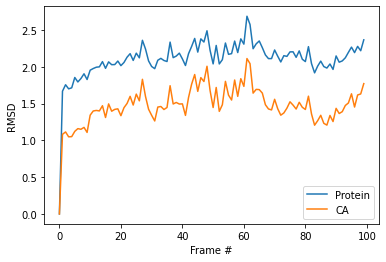

In [34]:
n = universe.trajectory.n_frames
plt.plot(range(n),protrmsd,range(n),carmsd)
plt.xlabel("Frame #")
plt.ylabel('RMSD')
plt.legend(['Protein','CA'],loc='lower right');

In [35]:
%%html
<div id="mdtri" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#mdtri';
	jQuery(divid).asker({
	    id: divid,
	    question: "If frame 40 is ~2 RMSD from the start and frame 80 is ~2 RMSD from the start. What can be said about the RMSD between frames 40 and 80?",
		answers: ['It is ~0', 'It is < ~2','It is < ~4','Nothing'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Project

* Compute RMSDs
 * between frame 0 and frame 40
 * between frame 40 and frame 80
 * between frame 0 and frame 80
* Compute all RMSDs (put in a list)
 * to starting frame
 * to ending frame
* Plot start/end RMSDs
* Align protein to only resids 760-924, redo above

In [ ]:
!wget https://asinansaglam.github.io/python_bio_2022/files/shmt2.prmtop
!wget https://asinansaglam.github.io/python_bio_2022/files/shmt2.dcd

In [36]:
import MDAnalysis
from MDAnalysis.analysis.rms import *  #this pulls in an rmsd function

universe = MDAnalysis.Universe('shmt2.prmtop', 'shmt2.dcd')
prot = universe.select_atoms('protein')

startref = prot.positions
universe.trajectory[-1]
endref = prot.positions  

startrmsd = []
endrmsd = []
for ts in universe.trajectory:
    startrmsd.append(rmsd(startref,prot.positions))
    endrmsd.append(rmsd(endref,prot.positions))